In [37]:
# EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimização de Hiperparâmetros
import optuna

In [38]:
# Carregar Dataset

df_segmento = pd.read_csv('./datasets/segmentos_clientes.csv')

### EDA

In [39]:
# Visualizar os dados

df_segmento.head()

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver


In [40]:
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [41]:
# Valores possíveis das variáveis categóricas

df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [42]:
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [43]:
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [44]:
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [45]:
# Distribuição da variável target: "segmento_de_cliente"

df_segmento['segmento_de_cliente'].value_counts()

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [46]:
# Ver em formato gráfico usando plotly

# Lista ordenada de 'segmento_de_cliente'

segments_ordered = ['Starter', 'Bronze', 'Silver', 'Gold']

segments = df_segmento['segmento_de_cliente'].value_counts()
fig = px.bar(segments, color=segments.index, category_orders={'segmento_de_cliente':segments_ordered} )
fig.show()

In [47]:
# Ver em formato gráfico usando plotly

# Lista ordenada de 'segmento_de_cliente' percentulamente

segments_ordered = ['Starter', 'Bronze', 'Silver', 'Gold']

segments_percentual = df_segmento['segmento_de_cliente'].value_counts(normalize=True) * 100
fig = px.bar(segments_percentual, color=segments_percentual.index, category_orders={'segmento_de_cliente':segments_ordered} )
fig.show()


In [48]:
# Ver em formato gráfico usando plotly

# Lista ordenada de 'segmento_de_cliente' percentulamente

localizacoes_percentual = df_segmento['localizacao'].value_counts(normalize=True) * 100
fig = px.bar(localizacoes_percentual, color=localizacoes_percentual.index )
fig.show()

In [49]:
# Ver em formato gráfico usando plotly

# Lista ordenada de 'segmento_de_cliente' percentulamente

atividades_economicas_percentual = df_segmento['atividade_economica'].value_counts(normalize=True) * 100
fig = px.bar(atividades_economicas_percentual, color=atividades_economicas_percentual.index )
fig.show()

In [50]:
# Ver em formato gráfico usando plotly

# Lista ordenada de 'segmento_de_cliente' percentulamente

inovacoes_percentual = df_segmento['inovacao'].value_counts(normalize=True) * 100
fig = px.bar(inovacoes_percentual, color=inovacoes_percentual.index )
fig.show()

In [51]:
# Crosstab das variáveis categóricas usando plotly

fig = ff.create_table(pd.crosstab( df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[segments_ordered].reset_index())
fig.show()

In [52]:
# Crosstab das variáveis categóricas usando plotly

fig = ff.create_table(pd.crosstab( df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[segments_ordered].reset_index())
fig.show()

In [53]:
# Crosstab das variáveis categóricas usando plotly

fig = ff.create_table(pd.crosstab( df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[segments_ordered].reset_index())
fig.show()

In [54]:
# Análise das variáveis numéricas ('faturamento_mensal', 'idade') usando o plotly

# Verificar os histogramas

fig = px.histogram(df_segmento, x='faturamento_mensal')
fig.show()
fig = px.histogram(df_segmento, x='idade')
fig.show()
# Análise das variáveis numéricas ('faturamento_mensal', 'idade') usando o plotly



In [55]:
# Boxplot entre 'idade' e 'segmento_de_cliente' e entre 'faturamento_mensal'

px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': segments_ordered})

In [56]:
# Boxplot entre 'idade' e 'segmento_de_cliente' e entre 'faturamento_mensal'

px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': segments_ordered})

In [57]:
# Correlações das variáveis categóricas
# Teste de Qui-Quadrado de Pearson
# H01 - as variáveis são independentes

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.



In [58]:
# Valor esperado = frequência que seria esperada se não houvesse associação entre as variáveis -> é calculado a distribuição assumida no teste do Qui-Quadrado (variávies independentes)
# Valor observado = frequência real nos dados do dataset
# Estatisticas = teste

estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


- pvalue > 0,05 -> aceita a hipótese nula -> variáveis independentes: 'localizacao' e 'segmento_de_cliente'

In [59]:
# Correlações das variáveis categóricas
# Teste de Qui-Quadrado de Pearson
# H01 - as variáveis são independentes

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')
estatisticas.round(5)

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

divide by zero encountered in power

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning:

divide by zero encountered in divide



,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,9.96998,9.0,0.35292,0.08153,0.18948
1,cressie-read,0.66667,10.60995,9.0,0.30339,0.08410,0.20060
2,log-likelihood,0.00000,13.54637,9.0,0.13940,0.09503,0.25375
3,freeman-tukey,-0.50000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,9.0,0.00000,inf,NaN
5,neyman,-2.00000,NaN,9.0,NaN,NaN,NaN


- pvalue > 0,05 -> aceita a hipótese nula -> variáveis são independentes: 'segmento_de_cliente' e 'atividade_economica'

In [60]:
# Correlações das variáveis categóricas
# Teste de Qui-Quadrado de Pearson
# H01 - as variáveis são independentes

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')
estatisticas.round(5)

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

divide by zero encountered in power

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Administrador\.virtualenvs\decision_tree-gEdH0bHS\lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning:

divide by zero encountered in divide



,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,NaN
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


- pvalue < 0,05 -> rejeita a hipótese nula -> variáveis são dependentes: 'segmento_de_cliente' e 'inovacao'

#### Resumo
- localização x segmento -> independentes
- atividade economica x segmento -> independentes
- inovacação  x segmento -> dependente

## Treinamento do Modelo

In [61]:
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

# Algoritmo do Scikit-Learn de Arvore de Decisão não trabalha com variável categórica, então precisa converter

# Lista de Variáveis Categóricas

categorical_nominal_variables = ['localizacao', 'atividade_economica']
categorical_ordinal_variables = ['inovacao']

# Lista de Variáveis Numéricas

numerical_variables = ['idade', 'faturamento_mensal']

# Criar um Transformer para as variáveis categóricas nominais

categorical_nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar un Tranformer para as variáveis categóricas ordinais

categorical_ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], handle_unknown='error'))
])

# Criar um Transformer para as variáveis numéricas

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Criar um Preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('nominal', categorical_nominal_transformer, categorical_nominal_variables),
    ('ordinal', categorical_ordinal_transformer, categorical_ordinal_variables),
    ('numerical', numerical_transformer, numerical_variables)
])

# Criar um Pipeline

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

### Validação Cruzada

In [62]:
# Treinar o modelo com validação cruzada usando o StratifiedKFold, dado que as classes estão desbalanceadas

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)

scores = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)


In [63]:
# Mostrar o retorno do Cross Validation

pd.DataFrame(scores)

,fit_time,score_time,estimator,test_accuracy
0,0.022901,0.008960,"(ColumnTransformer(transformers=[('nominal',\n...",0.574850
1,0.032083,0.010953,"(ColumnTransformer(transformers=[('nominal',\n...",0.628743
2,0.016928,0.006971,"(ColumnTransformer(transformers=[('nominal',\n...",0.602410


In [71]:
scores['test_accuracy'].mean()

np.float64(0.6020008176418248)

In [65]:
# Acurácia = total de previsões corretas / total de previsões

### Análise de Métricas

In [66]:
# Fazendo predições usando o cross validate

y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

# Avaliar desempenho do modelo

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Bronze       0.57      0.63      0.60       202
        Gold       0.11      0.12      0.12        16
      Silver       0.67      0.61      0.64       260
     Starter       0.47      0.36      0.41        22

    accuracy                           0.59       500
   macro avg       0.45      0.43      0.44       500
weighted avg       0.60      0.59      0.59       500



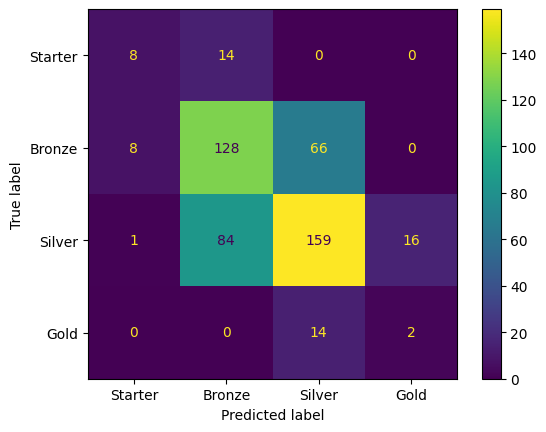

In [67]:
# Matriz de Confusão

cm = confusion_matrix(y, y_pred, labels=segments_ordered)
disp = ConfusionMatrixDisplay(cm, display_labels=segments_ordered)
disp.plot()

### Tunning de Hiperparâmetros

In [68]:
# Ajustar hiperparâmetros usando Optuna
# 1) min_samples_leaf = mínimos de instâncias (valores da base) para formar uma folha 
# 2) max_depth = profundidade máxima da árvore

def decisiontree_optuna(trial):
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
  max_depth = trial.suggest_int('max_depth', 2, 8)

  dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
  dt_model.set_params(classifier__max_depth=max_depth)

  scores = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'])

  return scores['test_accuracy'].mean()


In [72]:
# Executar automação de experimentos

estudo_deciontree_optuna = optuna.create_study(direction='maximize')
estudo_deciontree_optuna.optimize(decisiontree_optuna, n_trials=300)

[I 2024-06-25 11:48:59,361] A new study created in memory with name: no-name-84d93cb5-0bf6-4598-bc87-5af050155ff8
[I 2024-06-25 11:48:59,444] Trial 0 finished with value: 0.6780655556357166 and parameters: {'min_samples_leaf': 13, 'max_depth': 6}. Best is trial 0 with value: 0.6780655556357166.
[I 2024-06-25 11:48:59,533] Trial 1 finished with value: 0.6901257725512829 and parameters: {'min_samples_leaf': 10, 'max_depth': 3}. Best is trial 1 with value: 0.6901257725512829.
[I 2024-06-25 11:48:59,606] Trial 2 finished with value: 0.6800856119087128 and parameters: {'min_samples_leaf': 19, 'max_depth': 6}. Best is trial 1 with value: 0.6901257725512829.
[I 2024-06-25 11:48:59,686] Trial 3 finished with value: 0.663997306591636 and parameters: {'min_samples_leaf': 6, 'max_depth': 7}. Best is trial 1 with value: 0.6901257725512829.
[I 2024-06-25 11:48:59,756] Trial 4 finished with value: 0.688129764567251 and parameters: {'min_samples_leaf': 14, 'max_depth': 2}. Best is trial 1 with value:

In [73]:
# Mostrar melhor resultaod e conjunto de hiperparâmetros

estudo_deciontree_optuna.best_value, estudo_deciontree_optuna.best_params

(0.7000937883269606, {'min_samples_leaf': 5, 'max_depth': 4})

### Visualizar Árvore

In [83]:
# Preparar conjunto de dados
# OBS.: APENAS PARA FINS DE VISUALIZAÇÃO

X_train_tree = X.copy()
X_train_tree['localizal_label'] = X_train_tree['localizacao'].astype('category').cat.codes
X_train_tree['atividade_economica_label'] =  X_train_tree['atividade_economica'].astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizal_label': 'localizacao', 'atividade_economica_label': 'atividade_economica'}, inplace=True)

y_train_tree = y.copy()

clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=estudo_deciontree_optuna.best_params['min_samples_leaf'], max_depth=estudo_deciontree_optuna.best_params['max_depth'])

clf_decisiontree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

[Text(0.43478260869565216, 0.9, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.1956521739130435, 0.7, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.31521739130434784, 0.8, 'True  '),
 Text(0.08695652173913043, 0.5, 'inovacao <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.043478260869565216, 0.3, 'gini = 0.48\nsamples = 5\nvalue = [2, 0, 0, 3]\nclass = Gold'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 8]\nclass = Gold'),
 Text(0.30434782608695654, 0.5, 'faturamento_mensal <= 914181.812\ngini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.21739130434782608, 0.3, 'idade <= 6.5\ngini = 0.319\nsamples = 59\nvalue = [48, 0, 4, 7]\nclass = Starter'),
 Text(0.17391304347826086, 0.1, 'gini = 0.496\nsamples = 11\nvalue = [6, 0, 0, 5]\nclass = Starter'),
 Text(0.260869565217391

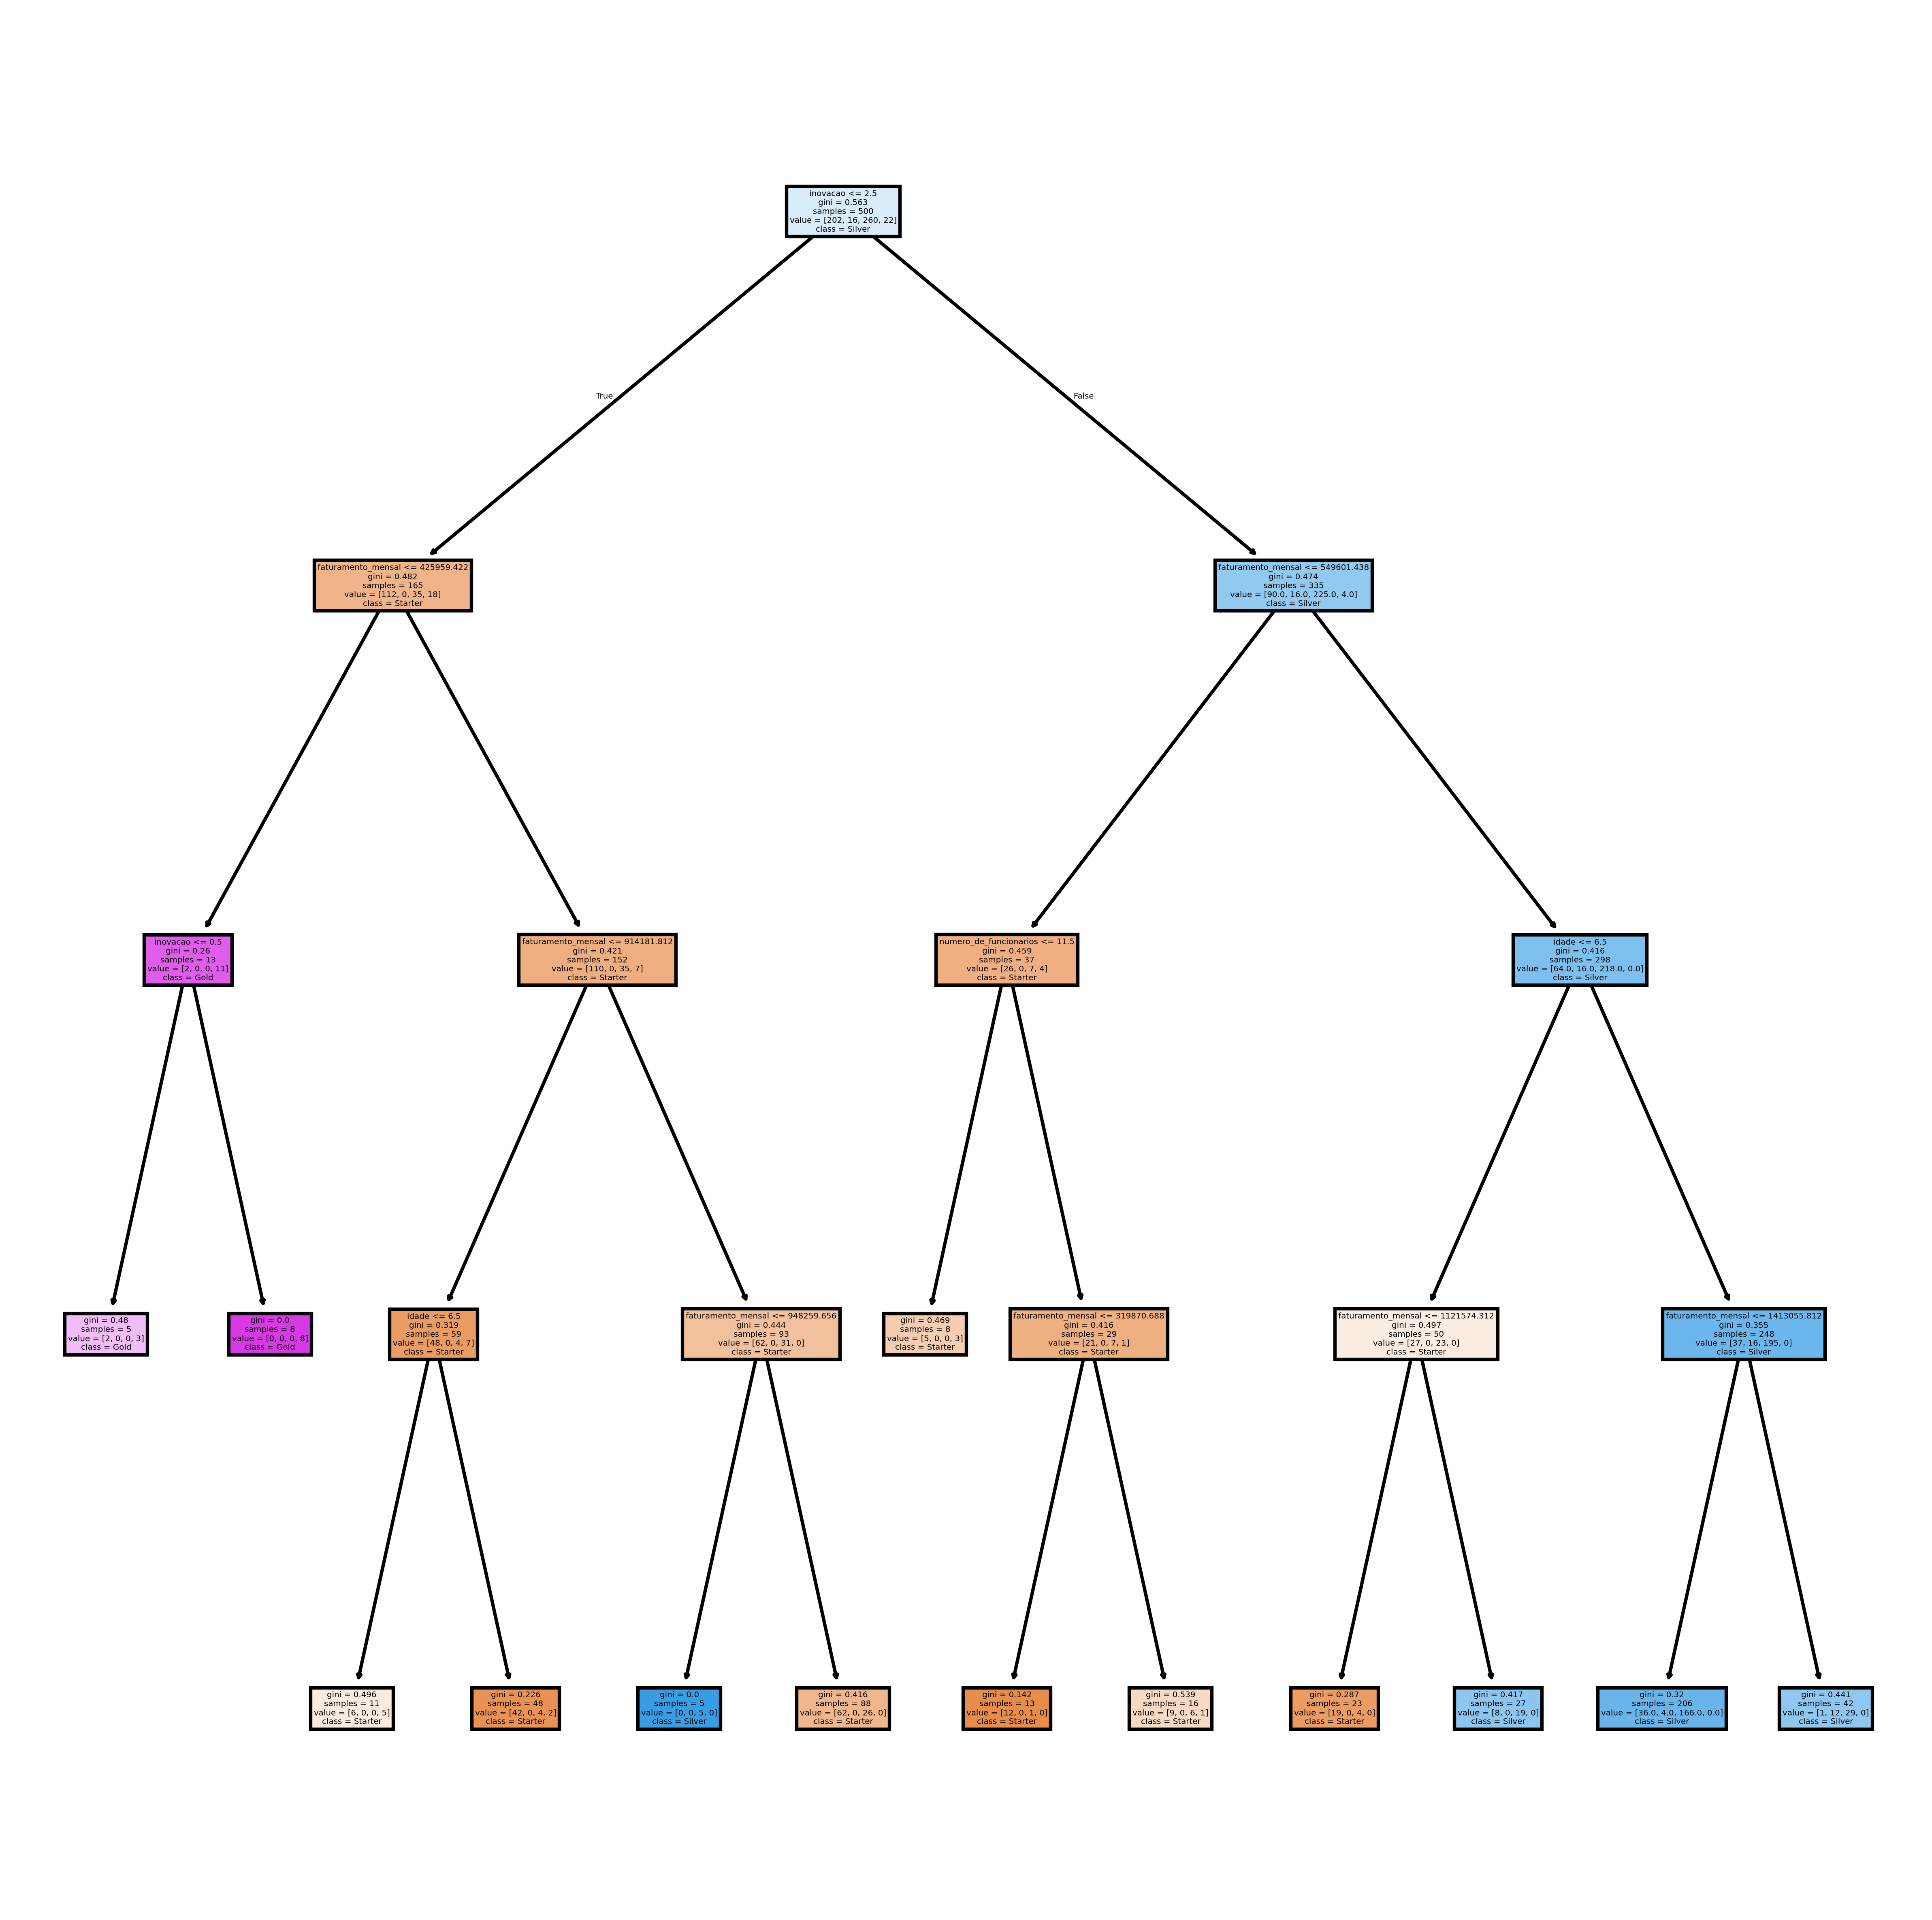

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=600)

plot_tree(clf_decisiontree, feature_names=X_train_tree.columns, class_names=segments_ordered, filled=True)

## Treinamento do Modelo Hipertunado

In [85]:
import joblib

# Criar um pipeline "tunado"

dt_model_tunado = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(min_samples_leaf=estudo_deciontree_optuna.best_params['min_samples_leaf'], max_depth=estudo_deciontree_optuna.best_params['max_depth']))
])

# Treinar

dt_model_tunado.fit(X, y)

# Salvar Modelo

joblib.dump(dt_model_tunado, 'modelo_decisiontree.pkl')


['modelo_decisiontree.pkl']

### Construir aplicação

In [97]:
# Entregar modelo como app de predição batch (por arquivo)

import gradio as gr

modelo = joblib.load('./modelo_decisiontree.pkl')

def predict(arquivo):
  df_empresas = pd.read_csv(arquivo.name)
  y_pred = modelo.predict(df_empresas)

  df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
  df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
  df_predicoes.to_csv('./predicoes.csv', index=False)

  return './predicoes.csv'

In [98]:
demo = gr.Interface(
  predict,
  gr.File(file_types=['.csv']),
  "file"
)

demo.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
